# MuthuPalaniappan M - 21011101079 Machine Learning Assignment

# Problem Statement

#####  *The given dataset, perform necessary preprocessing and build Logistic regression, K-Nearest neighbor and Naive bayes classifier models and print the comparative accuracy score. Comment on the best model for this dataset*

### About the Dataset

##### Feature Description

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

• cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

• cap-color:brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

• bruises: bruises=t,no=f

• odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

• gill-attachment: attached=a,descending=d,free=f,notched=n

• gill-spacing: close=c,crowded=w,distant=d

• gill-size: broad=b,narrow=n

• gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

• stalk-shape: enlarging=e,tapering=t

• stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

• stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

• stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

• stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

• stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

• veil-type: partial=p,universal=u

• veil-color: brown=n,orange=o,white=w,yellow=y

• ring-number: none=n,one=o,two=t

• ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

• spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

• population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

• habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# Importing Packages

In [143]:
import numpy as np    #numerical python
import pandas as pd   #DataFrame manipulation
import seaborn as sns #Visualization toolkit
import matplotlib.pyplot as plt #Visualization toolkit
from sklearn.preprocessing import LabelEncoder #encoding categorical features
from sklearn.model_selection import train_test_split #training and testing records split
from sklearn.preprocessing import StandardScaler #used for feature scallling
from sklearn.linear_model import LogisticRegression # LogisticRegression
from sklearn.naive_bayes import GaussianNB #naive bayes
from sklearn.model_selection import GridSearchCV #GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve # Metrices
from mlxtend.plotting import plot_decision_regions
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

# Loading DataSet

In [4]:
data = pd.read_csv("DataSet/mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Information about the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

- The Data is not includes any numerical features
- All the 22 features are object/categorical.

In [7]:
# getting columns
print(f"Features : {data.columns}")

Features : Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [8]:
# Getting records and features
print(f"Records : {data.shape[0]}\nFeatures : {data.shape[1]}")

Records : 8124
Features : 23


# Data Preparing

### Descriptive Statitics

In [12]:
data.describe(include='object').T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


- The following Descriptive Statitics provides the information about the **count**,**Unique**,**Top**,and **Frequency** of every features in the dataset

### Data Cleaning

### Checking for the null values in the dataset

<AxesSubplot:>

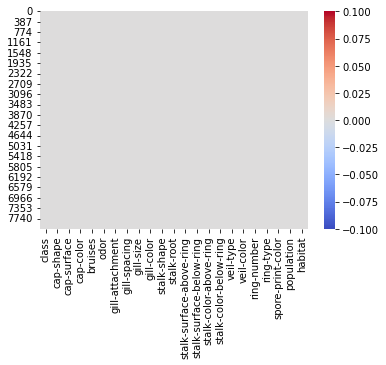

In [22]:
sns.heatmap(data.isna(),annot=False,cmap='coolwarm')

- There is no Null values present in the dataset

# Outlier Deduction - EDA

In [88]:
def OutLiersBox(df,nameOfFeature):
    
    trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = 'rgb(7,40,89)'),
        line = dict(
            color = 'rgb(7,40,89)')
    )

    trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = 'rgb(9,56,125)'),
        line = dict(
            color = 'rgb(9,56,125)')
    )

    trace2 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = 'rgb(8,81,156)',
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(
                outliercolor = 'rgba(219, 64, 82, 0.6)',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(8,81,156)')
    )

    trace3 = go.Box(
        y = df[nameOfFeature],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = 'rgb(107,174,214)'),
        line = dict(
            color = 'rgb(107,174,214)')
    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )

    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig, filename = "Outliers")

In [90]:
OutLiersBox(data,data.columns[1])

In [140]:
OutLiersBox(data,data.columns[2])

In [141]:
OutLiersBox(data,data.columns[3])

# Feature Alteration

##### Since all the features present in the dataset are categorical. These features are to be encoded in order to fit in the machine learning models

In [24]:
Label_Encoder = LabelEncoder() #Label encoder class
for i in data.columns:
    data[i] = Label_Encoder.fit_transform(data[i]) #fit and transform

In [29]:
#Features Data types after encoding
data.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

#### Selection of Target Feature

In [53]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

# Records - Train Test Split

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

- Test Size = 70% Training and 30% Testing
- random_state = Seed Value - 0

In [55]:
print(f"Training Shape : {x_train.shape}\nTesting Shape : {y_train.shape}")

Training Shape : (5686, 22)
Testing Shape : (5686,)


# Feature Scalling

In [58]:
stdSC = StandardScaler() #Standard Scaler
x_train = stdSC.fit_transform(x_train)
x_test = stdSC.fit_transform(x_test)

# Model Building

#### 1- Logistic Regression

In [160]:
LR = LogisticRegression()
LR.fit(x_train,y_train) #model fitting
y_pred = LR.predict(x_test)

##### Accuracy metrics

In [162]:
LR_acc = accuracy_score(y_pred,y_test)*100
print(f"Accuracy Score : {LR_acc}")

Accuracy Score : 94.74979491386382


In [86]:
#classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.93      0.96      0.94      1138

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



<AxesSubplot:>

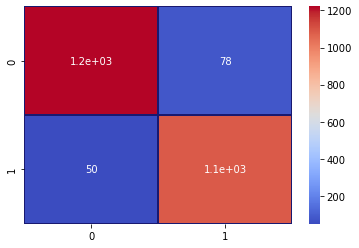

In [85]:
#confusion matrix
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,linewidths=0.2,cmap='coolwarm',linecolor='midnightblue')

#### ROC-AUC-Curve

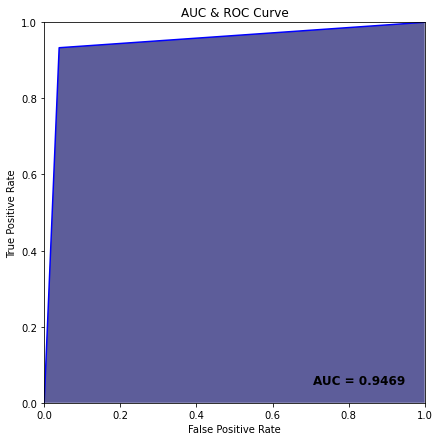

In [96]:
auc = roc_auc_score(y_test,y_pred)
fp_rate,tp_rate,thresholds = roc_curve(y_test,y_pred)
plt.figure(figsize=(15,7))
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fp_rate, tp_rate, 'b')
plt.fill_between(fp_rate, tp_rate, facecolor='midnightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#### 2- Navie Bayes

In [107]:
GB = GaussianNB()
from sklearn.model_selection import cross_val_score
acc = cross_val_score(estimator=GB,X=x_train,y=y_train,cv=30)
print(f"Average Accuracies : {np.mean(acc)}")
print(f"Standard Deivation : {np.std(acc)}")

Average Accuracies : 0.9219251833286922
Standard Deivation : 0.01924188899227322


In [108]:
y_pred = GB.fit(x_train,y_train).predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 1, 1])

#### Accuracy Metrics

In [156]:
NB_acc = (accuracy_score(y_pred,y_test)*100)
print(f"Accuracy Score : {NB_acc}")

Accuracy Score : 100.0


In [111]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1258
           1       0.92      0.91      0.91      1180

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438



#### Confusion Matrix

<AxesSubplot:>

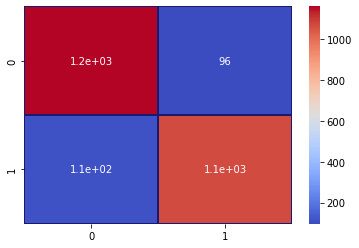

In [112]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,linewidths=0.2,cmap='coolwarm',linecolor='midnightblue')

#### ROC-Curve with AUC

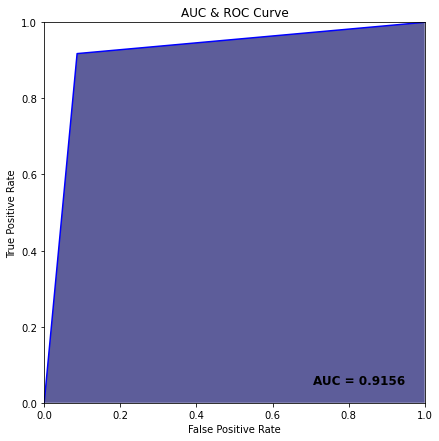

In [114]:
auc = roc_auc_score(y_test,y_pred)
fp_rate,tp_rate,thresholds = roc_curve(y_test,y_pred)
plt.figure(figsize=(15,7))
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fp_rate, tp_rate, 'b')
plt.fill_between(fp_rate, tp_rate, facecolor='midnightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#### 3- KNN

In [115]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
def KNN_best_parameters(x_train,x_test,y_train,y_test):
    
    k_range = list(range(1,10)) 
    weight_options = ['uniform','distance'] 
    #manhattan_distance = 1
    #euclidean_distance = 2
    distance_options = [1,2] 
    print()
    param_grid = dict(n_neighbors=k_range,weights=weight_options,p=distance_options) 

    knn =KNeighborsClassifier() 
    grid = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy') 
    grid.fit(x_train, y_train) 
    
    print('Best training score: {} with parametres: {}'.format(grid.best_score_,grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_) 
    knn.fit(x_train, y_train)
    
    y_predict_test = knn.predict(x_test)
    y_predict_train = knn.predict(x_train)

    cm_test = confusion_matrix(y_test,y_predict_test)
    cm_train = confusion_matrix(y_train,y_predict_train)

    acc_test = accuracy_score(y_test,y_predict_test)  
    acc_train = accuracy_score(y_train,y_predict_train)

    print('Test Score: {}, Train Score: {}'.format(acc_test,acc_train))
    print()
    print('CM Test:',cm_test)
    print('CM Train:',cm_train)
    
    return grid

In [119]:
KNN_best_parameters(x_train,x_test,y_train,y_test)


Best training score: 1.0 with parametres: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

Test Score: 1.0, Train Score: 1.0

CM Test: [[1272    0]
 [   0 1166]]
CM Train: [[2936    0]
 [   0 2750]]


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

- Number of neighbours : 1 - Provides maximum accuracy

In [166]:
KNN = KNeighborsClassifier(n_neighbors=1)
y_pred = KNN.fit(x_train,y_train).predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1])

#### Accuracy Metrices

In [169]:
#Accuracy_Score
KNN_acc = accuracy_score(y_pred,y_test)*100
print(f"Accuracy Score : {KNN_acc}")

Accuracy Score : 100.0


In [170]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



##### Confusion Matrix

<AxesSubplot:>

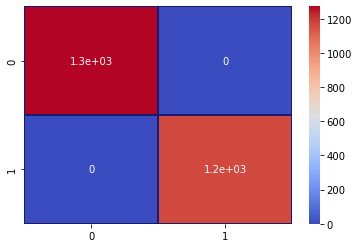

In [171]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,linecolor='midnightblue',linewidths=0.2,cmap='coolwarm')

# Benchmark of Algorithms

In [178]:
algo_acc = pd.DataFrame({"Logisitic_Regression" :LR_acc,"Navie_Bayes":NB_acc,"KNN":KNN_acc},index=['Accuracy'])

In [181]:
algo_acc.T.style.background_gradient(cmap='coolwarm')

,Accuracy
Logisitic_Regression,94.749795
Navie_Bayes,100.000000
KNN,100.000000


- For this particular dataset Logisitic Regression Performs Poor as compared to Navie Bayes and KNN